In [9]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import matplotlib.cm as cm
from matplotlib.patches import Patch
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy.stats import norm
import importlib
import basicfunc as bf

importlib.reload(bf)

<module 'basicfunc' from 'c:\\Users\\Utente\\Desktop\\uni\\MAGISTRALE\\ESAMI\\laboratory1\\lab\\imaging\\basicfunc.py'>

In [10]:
D1 = uproot.open('data_imaging\\group23_22Na_D1_10min_definitivo\\RAW\\DataR_CH0@DT5720B_781_group23_22Na_D1_10min_definitivo.root')
D2 = uproot.open('data_imaging\\group23_22Na_D2_10min_definitivo_sicuri\\RAW\\DataR_CH1@DT5720B_781_group23_22Na_D2_10min_definitivo_sicuri.root')
D3 = uproot.open('data_imaging\\group23_22Na_D3_10min_def\\RAW\\DataR_CH2@DT5720B_781_group23_22Na_D3_10min_def.root')
D4 = uproot.open('data_imaging\\group23_22Na_D4_10min_def\\RAW\\DataR_CH3@DT5720B_781_group23_22Na_D4_10min_def.root')
D5 = uproot.open('data_imaging\\group23_22Na_D5_10min_def\\RAW\\DataR_CH0@DT5720B_467_group23_22Na_D5_10min_def.root')
D6 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH1@DT5720B_467_group23_22Na_D6_10min_def.root')
D7 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH2@DT5720B_467_group23_22Na_D6_10min_def.root')
D8 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH3@DT5720B_467_group23_22Na_D6_10min_def.root')

In [11]:
d1 = np.asarray(D1['Data_R;1']['Energy'].array())
d2 = np.asarray(D2['Data_R;2']['Energy'].array())
d3 = np.asarray(D3['Data_R;2']['Energy'].array())
d4 = np.asarray(D4['Data_R;2']['Energy'].array())
d5 = np.asarray(D5['Data_R;3']['Energy'].array())
d6 = np.asarray(D6['Data_R;3']['Energy'].array())
d7 = np.asarray(D7['Data_R;2']['Energy'].array())
d8 = np.asarray(D8['Data_R;2']['Energy'].array())


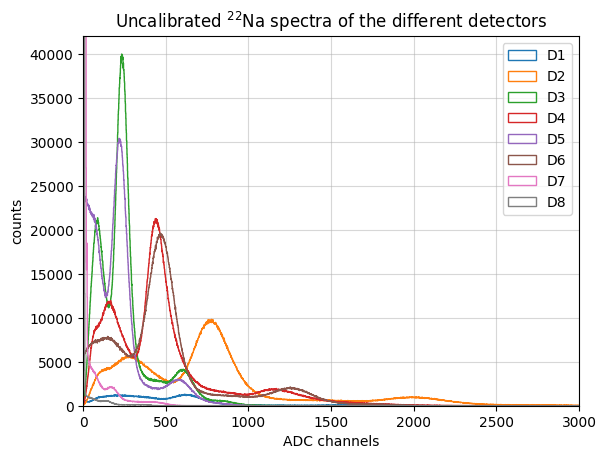

In [12]:
plt.hist(d1, bins=int(d1.max()), histtype='step', label='D1')
plt.hist(d2, bins=int(d2.max()), histtype='step', label='D2')
plt.hist(d3, bins=int(d3.max()), histtype='step', label='D3')
plt.hist(d4, bins=int(d4.max()), histtype='step', label='D4')
plt.hist(d5, bins=int(d5.max()), histtype='step', label='D5')
plt.hist(d6, bins=int(d6.max()), histtype='step', label='D6')
plt.hist(d7, bins=int(d7.max()), histtype='step', label='D7')
plt.hist(d8, bins=int(d8.max()), histtype='step', label='D8')
plt.title(r'Uncalibrated $^{22}$Na spectra of the different detectors')
plt.xlabel('ADC channels')
plt.ylabel('counts')
plt.ylim(0, 42000)
plt.xlim(0, 3000)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [13]:
print('D1 \nCompton')
# d1normCom = bf.normal(d1, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the of $^{22}$Na', xmin=500, xmax=750, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Primo picco:')
d1norm1 = bf.normal(d1, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $1^{st}$peak of $^{22}$Na', xmin=500, xmax=750, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco:')
d1norm2 = bf.normal(d1, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $2^{nd}$peak of $^{22}$Na', xmin=1400, xmax=2000, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D2 \nPrimo picco')
d2norm1 = bf.normal(d2, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $1^{st}$peak of $^{22}$Na', xmin=600, xmax=950, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d2norm2 = bf.normal(d2, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $2^{nd}$peak of $^{22}$Na', xmin=1750, xmax=2300, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D3 \nPrimo Picco')
d3norm1 = bf.normal(d3, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $1^{st}$peak of $^{22}$Na', xmin=170, xmax=300, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d3norm2 = bf.normal(d3, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $2^{nd}$peak of $^{22}$Na', xmin=520, xmax=700, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D4 \nPrimo picco')
d4norm1 = bf.normal(d4, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $1^{st}$peak of $^{22}$Na', xmin=320, xmax=570, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d4norm2 = bf.normal(d4, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $2^{nd}$peak of $^{22}$Na', xmin=1000, xmax=1350, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d5norm1 = bf.normal(d5, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $1^{st}$peak of $^{22}$Na', xmin=150, xmax=300, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d5norm2 = bf.normal(d5, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $2^{nd}$peak of $^{22}$Na', xmin=480, xmax=680, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d6norm1 = bf.normal(d6, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $1^{st}$peak of $^{22}$Na', xmin=350, xmax=580, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d6norm2 = bf.normal(d6, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $2^{nd}$peak of $^{22}$Na', xmin=1100, xmax=1450, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d7norm1 = bf.normal(d7, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $1^{st}$peak of $^{22}$Na', xmin=140, xmax=200, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d7norm2 = bf.normal(d7, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $2^{nd}$peak of $^{22}$Na', xmin=350, xmax=500, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d8norm1 = bf.normal(d8, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $1^{st}$peak of $^{22}$Na', xmin=100, xmax=200, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d8norm2 = bf.normal(d8, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the $2^{nd}$peak of $^{22}$Na', xmin=250, xmax=400, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')

D1 
Compton
Primo picco:
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 338109.3599060629 ± 1905.151088414951
Media = 616.0207899885756 ± 0.4835257283466749
Sigma = 110.79018891855962 ± 0.8060963475372384
Chi-quadro = 357.134863942679
Chi-quadro ridotto = 1.445890137419753
Integrale dell'istogramma nel range [394.44041215145637, 837.6011678256949] = 371889 ± 609
Secondo picco:
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 43765.79421203449 ± 299.57369506237745
Media = 1624.6067070564497 ± 1.2564103943678144
Sigma = 168.99294309209205 ± 1.4516617266924874
Chi-quadro = 662.171225457022
Chi-quadro ridotto = 1.1091645317538057
Integrale dell'istogramma nel range [1286.6208208722655, 1962.592593240634] = 44017 ± 209
______________________________________________________________________________________________________________
D2 
Primo picco
Parametri ottimizzati:
-----------------------------------------------
Ampiezza =

Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.7574962004433666 ± 0.0015822020251721697
Intercetta (q) = 44.36659218904066 ± 1.0350907569265246
Chi-squared= 1.5369234634999633e-18
Non ha senso calcolare il chi2 ridotto


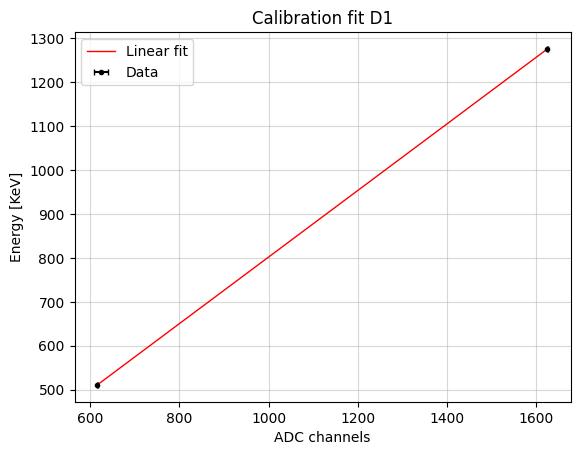

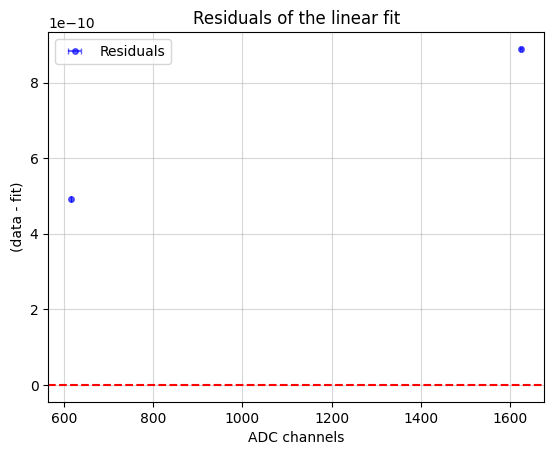

In [15]:
y_calib = np.array([511, 1275]) #KeV
xD1 = np.array([d1norm1[0][1], d1norm2[0][1]])
sxD1 = np.array([d1norm1[1][1], d1norm2[1][1],])
calibrazioneD1 = bf.linear_regression(xD1, y_calib, sx=sxD1, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D1', plot='yes')